# <center> **DATA SCIENCE 2: ASSIGNMENT 2** 

### <center> *Ian Brandenburg (2304791)* <center> [GitHub Repo](https://github.com/Iandrewburg/Data_Science/tree/main/Data_Science_2/Assignments/Assignment_2)
---

    
Take the alternative version of the famous “MNIST dataset”, which consists of images of Zalando’s articles. Your task is to correctly classify the images into one of the ten categories, such as dress or shirt. The images are in exactly the same format as we saw for the handwritten digits: 28x28 pixel grayscale images. The task is to build deep neural network models to predict the items. You can use either sklearn or keras; to get the data, go to the corresponding Kaggle page or use the fashion_mnist.load_data() function from the keras.datasets module. Make sure you split the training set into two sets: one for training your models on and one for validation and model selection. You can work with a relatively small train set if you have computational problems.

### 1. What would be an appropriate metric to evaluate your models? Why? 
---

An appropriate metric to evalute the models train on the Fashion MNIST data set would be the accuracy metric, since the dataset is a multi-class classification problem with balanced classes. The accuracy metric calculates the number of correctly predicted observations to the total number of observations. This provides a very straightforward assessment of the models' performance across the 10 different categories. 

### 2. Get the data and show some example images from the data.
---

In [1]:
import numpy as np
from keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

def plot_model_history(model_histories, labels):
    """Plot the training and validation accuracy and loss for multiple models."""
    if not model_histories or not labels or len(model_histories) != len(labels):
        print("The model histories and labels must be provided and match in length.")
        return

    plt.figure(figsize=(14, 5))

    # Plot training & validation accuracy
    plt.subplot(1, 2, 1)
    for model_history, label in zip(model_histories, labels):
        epochs = range(1, len(model_history.history['accuracy']) + 1)
        plt.plot(epochs, model_history.history['accuracy'], label=f'Training Acc {label}')
        plt.plot(epochs, model_history.history['val_accuracy'], label=f'Validation Acc {label}', linestyle="--")
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot training & validation loss
    plt.subplot(1, 2, 2)
    for model_history, label in zip(model_histories, labels):
        epochs = range(1, len(model_history.history['loss']) + 1)
        plt.plot(epochs, model_history.history['loss'], label=f'Training Loss {label}')
        plt.plot(epochs, model_history.history['val_loss'], label=f'Validation Loss {label}', linestyle="--")
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()


In [2]:
# loading the dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# converting labels to one-hot encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# splitting the training data into training and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.2, random_state=20240405)

# checking the shape of the datasets
print("Training set shape:", train_images.shape)
print("Validation set shape:", val_images.shape)
print("Test set shape:", test_images.shape)


Training set shape: (48000, 28, 28)
Validation set shape: (12000, 28, 28)
Test set shape: (10000, 28, 28)


In [3]:
print("Y Test set shape:", test_labels.shape)

Y Test set shape: (10000, 10)


Training Images:


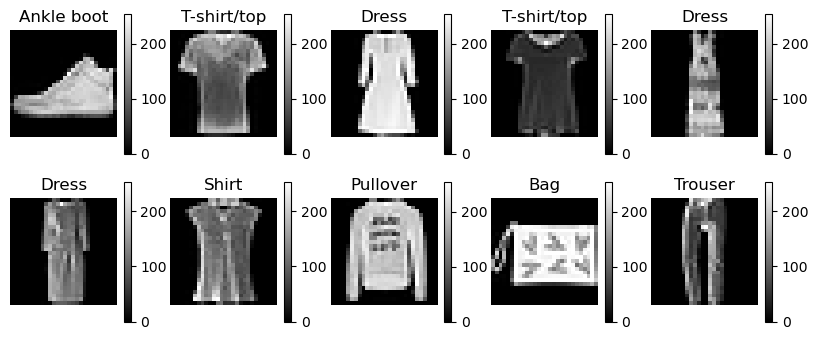

Validation Images:


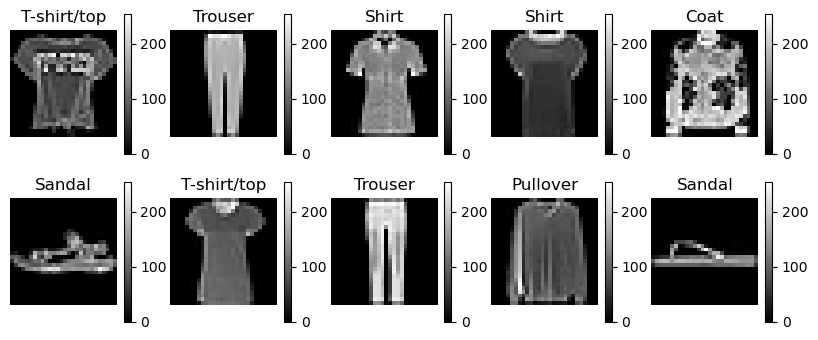

Test Images:


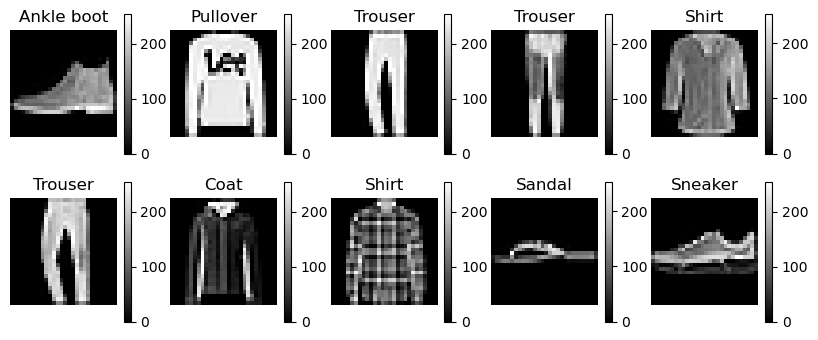

In [4]:
def show_images(images, labels, nrows=1, ncols=5, class_names=None):
    """Display a grid of images and their labels."""
    plt.figure(figsize=(10, 2 * nrows))
    for i in range(nrows * ncols):
        plt.subplot(nrows, ncols, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.colorbar()
        if class_names is not None:
            plt.title(class_names[np.argmax(labels[i])])
        else:
            plt.title(np.argmax(labels[i]))
        plt.axis('off')
    plt.show()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Show some training images
print("Training Images:")
show_images(train_images, train_labels, nrows=2, ncols=5, class_names=class_names)

# Show some validation images
print("Validation Images:")
show_images(val_images, val_labels, nrows=2, ncols=5, class_names=class_names)

# Show some testing images
print("Test Images:")
show_images(test_images, test_labels, nrows=2, ncols=5, class_names=class_names)


### 3. Train a simple fully connected single hidden layer network to predict the items. 

- Remember to normalize the data similar to what we did in class. Make sure that you use enough epochs so that the validation error begins to level off - provide a plot of the training history.


In [5]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Rescaling
from keras.callbacks import EarlyStopping

model = Sequential([
    Rescaling(1./255, input_shape=(28, 28, 1)),  # This layer scales input pixels to 0-1
    Flatten(),  # Convert 2D images to 1D vectors
    Dense(256, activation='relu'),  # Hidden layer with 256 units and ReLU activation
    Dense(10, activation='softmax')  # Output layer with 10 units (one for each class) and softmax activation
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print(model.summary())

history = model.fit(train_images, 
                    train_labels, 
                    epochs=25, 
                    validation_data=(val_images, val_labels), 
                    callbacks=[EarlyStopping(monitor='val_accuracy', 
                                             patience=5)])


C:\Users\iandr\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 203,530 (795.04 KB)

 Trainable params: 203,530 (795.04 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7768 - loss: 0.6509 - val_accuracy: 0.8477 - val_loss: 0.4202
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8558 - loss: 0.3912 - val_accuracy: 0.8643 - val_loss: 0.3649
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8750 - loss: 0.3397 - val_accuracy: 0.8658 - val_loss: 0.3728
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8816 - loss: 0.3166 - val_accuracy: 0.8723 - val_loss: 0.3485
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8938 - loss: 0.2847 - val_accuracy: 0.8724 - val_loss: 0.3520
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8991 - loss: 0.2717 - val_accuracy: 0.8694 - val_loss: 0.3528
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9039 - loss: 0.2576 - val_accuracy: 0.8851 - val_loss: 0.3168
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9095 - loss: 0.24

The model above flattens the data, since we are looking at developing a fully connected hidden layer, subsequently converting the 2D images to 1D vectors. A hidden layer with 128 units was created, using ReLU activation. Finally, the moodel sets the output layer to 10 units (one for each category), and uses softmax activation on the output. 25 epochs were used to ensure the accuracy metric would level off. This was tested by using the EarlyStopping function with a patience of 5. It stops at 19 epochs with a validation accuracy of 0.8847. There is still room for improvement, so we will try various other models to attempt to improve the accuracy and decrease the loss without overfitting. 

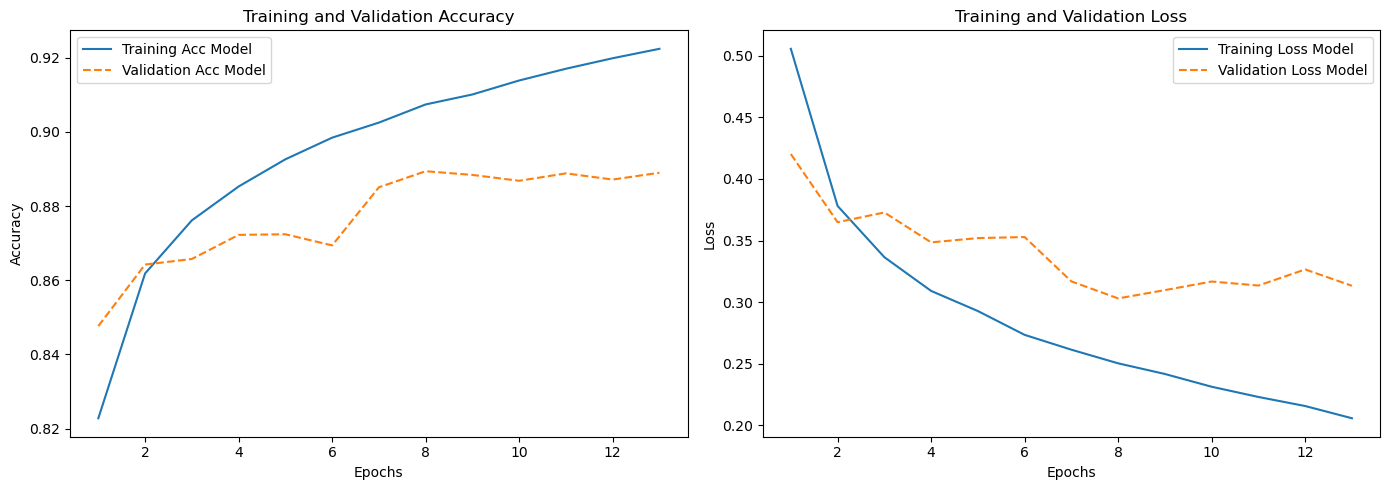

In [6]:
plot_model_history([history], ['Model'])


Here, both the loss and accuracy metrics for the validation set level off before the training loss and accuracy. The training loss seems to still be decreasing while the accuracy increasing, at the time that the EarlyStopping function stops the epochs from running further. Visually, it seems like the training set does not predict the validation model very well; however, they are not very far off in their accuracy and loss metrics, so this model my not be bad. 

### 4. Experiment with different network architectures and settings (number of hidden layers, number of nodes, regularization, etc.). 

- Train at least 3 models. Explain what you have tried and how it worked.

In [7]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

# Define model
model1 = Sequential([
    Rescaling(1./255, input_shape=(28, 28, 1)),  # This layer scales input pixels to 0-1
    Flatten(),
    Dense(512, activation='relu'),  # Increased number of nodes
    Dense(10, activation='softmax')
])

model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history1 = model1.fit(train_images, train_labels, epochs=25, validation_data=(val_images, val_labels), callbacks=[EarlyStopping(monitor='val_accuracy', patience=5)])


Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7882 - loss: 0.6067 - val_accuracy: 0.8446 - val_loss: 0.4483
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8628 - loss: 0.3834 - val_accuracy: 0.8748 - val_loss: 0.3459
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8799 - loss: 0.3279 - val_accuracy: 0.8788 - val_loss: 0.3338
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8872 - loss: 0.3050 - val_accuracy: 0.8783 - val_loss: 0.3390
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8950 - loss: 0.2798 - val_accuracy: 0.8830 - val_loss: 0.3248
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9027 - loss: 0.2668 - val_accuracy: 0.8896 - val_loss: 0.3044
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9068 - loss: 0.2519 - val_accuracy: 0.8875 - val_loss: 0.3136
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9085 - loss: 0.2447 - 

In [8]:
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

# Define model
model2 = Sequential([
    Rescaling(1./255, input_shape=(28, 28, 1)),  # This layer scales input pixels to 0-1
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),  # Add dropout
    Dense(10, activation='softmax')
])

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history2 = model2.fit(train_images, train_labels, epochs=25, validation_data=(val_images, val_labels), callbacks=[EarlyStopping(monitor='val_accuracy', patience=5)])


Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7457 - loss: 0.7181 - val_accuracy: 0.8516 - val_loss: 0.4100
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8364 - loss: 0.4537 - val_accuracy: 0.8523 - val_loss: 0.3949
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8461 - loss: 0.4211 - val_accuracy: 0.8637 - val_loss: 0.3656
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8545 - loss: 0.3956 - val_accuracy: 0.8692 - val_loss: 0.3568
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8604 - loss: 0.3834 - val_accuracy: 0.8707 - val_loss: 0.3481
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8647 - loss: 0.3630 - val_accuracy: 0.8744 - val_loss: 0.3387
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8673 - loss: 0.3539 - val_accuracy: 0.8752 - val_loss: 0.3408
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8736 - loss: 0.3478 - 

In [9]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

# Define model
model3 = Sequential([
    Rescaling(1./255, input_shape=(28, 28, 1)),  # This layer scales input pixels to 0-1
    Flatten(),
    Dense(256, activation='relu'),
    Dense(256, activation='relu'),  # Additional hidden layer
    Dense(10, activation='softmax')
])

model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history3 = model3.fit(train_images, train_labels, epochs=25, validation_data=(val_images, val_labels), callbacks=[EarlyStopping(monitor='val_accuracy', patience=5)])


Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7840 - loss: 0.6179 - val_accuracy: 0.8578 - val_loss: 0.3886
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8626 - loss: 0.3770 - val_accuracy: 0.8698 - val_loss: 0.3571
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8754 - loss: 0.3375 - val_accuracy: 0.8699 - val_loss: 0.3545
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8868 - loss: 0.3074 - val_accuracy: 0.8728 - val_loss: 0.3480
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8951 - loss: 0.2854 - val_accuracy: 0.8827 - val_loss: 0.3197
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8978 - loss: 0.2734 - val_accuracy: 0.8883 - val_loss: 0.3008
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9053 - loss: 0.2495 - val_accuracy: 0.8792 - val_loss: 0.3423
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9074 - loss: 0.2485 - 

In [10]:
# Define model
model4 = Sequential([
    Rescaling(1./255, input_shape=(28, 28, 1)),
    Flatten(),
    Dense(512, activation='relu'),  # Increased number of nodes
    Dropout(0.5),  # Add dropout
    Dense(512, activation='relu'),  # Increased number of nodes
    Dropout(0.5),  # Add dropout
    Dense(10, activation='softmax')
])

model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history4 = model4.fit(train_images, train_labels, epochs=25, validation_data=(val_images, val_labels), callbacks=[EarlyStopping(monitor='val_accuracy', patience=5)])


Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7014 - loss: 0.8157 - val_accuracy: 0.8463 - val_loss: 0.4298
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8230 - loss: 0.4922 - val_accuracy: 0.8527 - val_loss: 0.4034
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8293 - loss: 0.4672 - val_accuracy: 0.8572 - val_loss: 0.3926
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8424 - loss: 0.4418 - val_accuracy: 0.8587 - val_loss: 0.3867
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8460 - loss: 0.4243 - val_accuracy: 0.8617 - val_loss: 0.3781
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8465 - loss: 0.4232 - val_accuracy: 0.8709 - val_loss: 0.3719
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8509 - loss: 0.4163 - val_accuracy: 0.8679 - val_loss: 0.3621
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8528 - loss: 0.4072 - 

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

model5 = Sequential([
    Rescaling(1./255, input_shape=(28, 28, 1)),  # This layer scales input pixels to 0-1
    Flatten(),
    Dense(256, activation='relu'),  # Reduced number of nodes
    BatchNormalization(),  # Add batch normalization
    Dropout(0.3),  # Reduced dropout rate
    Dense(256, activation='relu'),  # Reduced number of nodes
    BatchNormalization(),  # Add batch normalization
    Dropout(0.3),  # Reduced dropout rate
    Dense(10, activation='softmax')
])

model5.compile(optimizer=Adam(learning_rate=0.001),  # Adjust learning rate
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Assuming you have defined train_images, train_labels, val_images, val_labels
history5 = model5.fit(train_images, train_labels, epochs=25, validation_data=(val_images, val_labels),
                      callbacks=[EarlyStopping(monitor='val_accuracy', patience=5)])


Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7415 - loss: 0.7569 - val_accuracy: 0.8237 - val_loss: 0.4639
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8233 - loss: 0.4868 - val_accuracy: 0.8432 - val_loss: 0.4114
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8351 - loss: 0.4559 - val_accuracy: 0.8518 - val_loss: 0.3980
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8517 - loss: 0.4100 - val_accuracy: 0.8574 - val_loss: 0.3832
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8516 - loss: 0.4099 - val_accuracy: 0.8591 - val_loss: 0.3711
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8528 - loss: 0.4025 - val_accuracy: 0.8629 - val_loss: 0.3599
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8584 - loss: 0.3920 - val_accuracy: 0.8754 - val_loss: 0.3423
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8592 - loss: 0.3807 - 

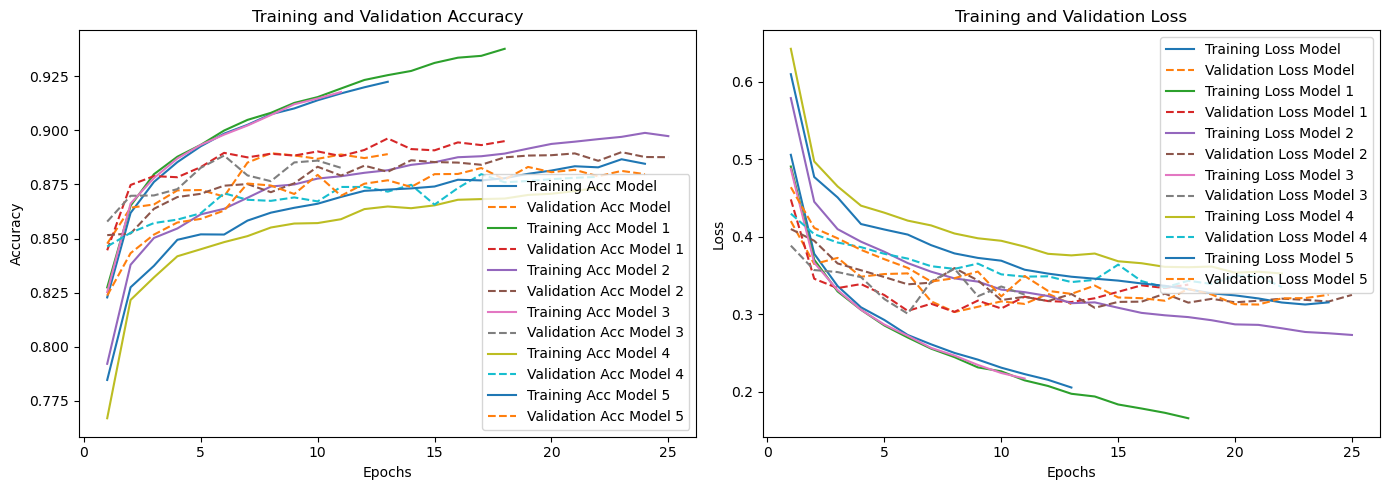

In [12]:
plot_model_history([history, history1, history2, history3, history4, history5], ['Model', 'Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5'])


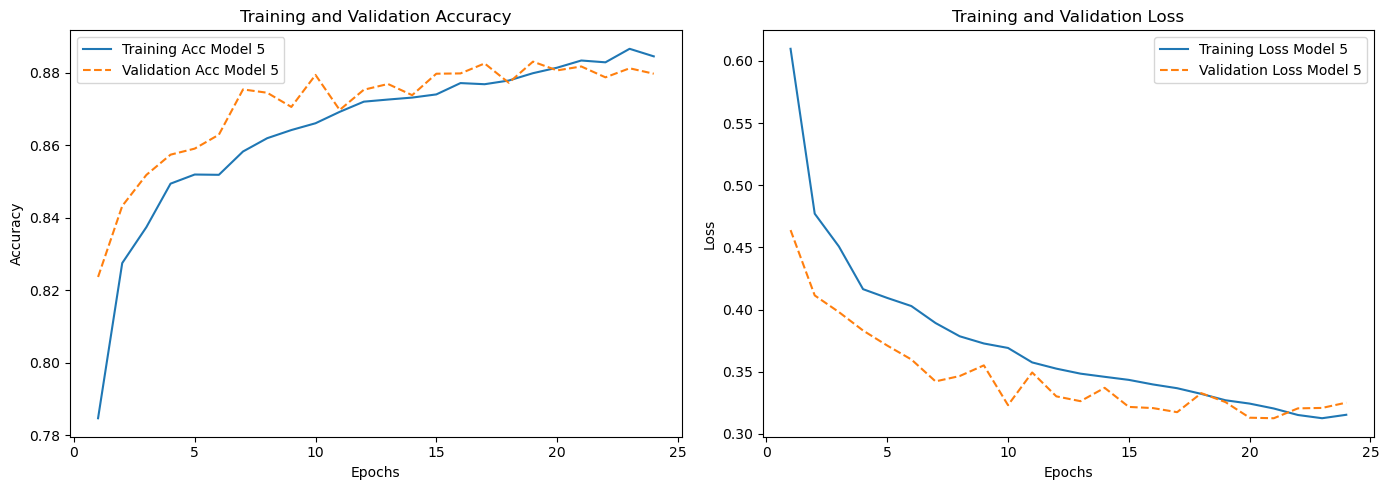

In [13]:
plot_model_history([history5], ['Model 5'])


### 5. Try to improve the accuracy of your model by using convolution. 
- Train at least two different models (you can vary the number of convolutional and pooling layers or whether you include a fully connected layer before the output, etc.).

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Rescaling

model6 = Sequential([
    Rescaling(1./255, input_shape=(28, 28, 1)),  # Scale input pixels to 0-1
    Conv2D(32, (3, 3), activation='relu'),  # Convolutional layer
    MaxPooling2D((2, 2)),  # Pooling layer
    Flatten(),  # Convert 3D feature maps to 1D feature vectors
    Dense(256, activation='relu'),  # Hidden layer
    Dense(10, activation='softmax')  # Output layer
])

model6.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

print(model6.summary())

# Assuming train_images, train_labels, val_images, val_labels are correctly shaped for a CNN
history6 = model6.fit(train_images, train_labels, epochs=25,
                      validation_data=(val_images, val_labels),
                      callbacks=[EarlyStopping(monitor='val_accuracy', patience=5)])


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_6 (Rescaling)         │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 256)            │     1,384,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,387,594 (5.29 MB)

 Trainable params: 1,387,594 (5.29 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.8087 - loss: 0.5357 - val_accuracy: 0.8806 - val_loss: 0.3279
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9007 - loss: 0.2729 - val_accuracy: 0.8959 - val_loss: 0.2776
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.9212 - loss: 0.2143 - val_accuracy: 0.9068 - val_loss: 0.2469
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9374 - loss: 0.1748 - val_accuracy: 0.9132 - val_loss: 0.2427
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9500 - loss: 0.1397 - val_accuracy: 0.9047 - val_loss: 0.2746
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9588 - loss: 0.1170 - val_accuracy: 0.9133 - val_loss: 0.2588
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.9660 - loss: 0.0943 - val_accuracy: 0.9102 - val_loss: 0.2772
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9

In [15]:
from tensorflow.keras.layers import Dropout

model7 = Sequential([
    Rescaling(1./255, input_shape=(28, 28, 1)),
    Conv2D(64, (3, 3), activation='relu'),  # Increase the number of filters
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),  # Additional convolutional layer
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),  # Smaller dense layer before output
    Dropout(0.5),  # Include dropout
    Dense(10, activation='softmax')
])

model7.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

print(model7.summary())

history7 = model7.fit(train_images, train_labels, epochs=25,
                      validation_data=(val_images, val_labels),
                      callbacks=[EarlyStopping(monitor='val_accuracy', patience=5)])


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_7 (Rescaling)         │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 256)            │       409,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 449,994 (1.72 MB)

 Trainable params: 449,994 (1.72 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.7334 - loss: 0.7260 - val_accuracy: 0.8721 - val_loss: 0.3409
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.8665 - loss: 0.3745 - val_accuracy: 0.8849 - val_loss: 0.3027
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.8825 - loss: 0.3192 - val_accuracy: 0.8979 - val_loss: 0.2729
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.8946 - loss: 0.2857 - val_accuracy: 0.9059 - val_loss: 0.2552
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.9089 - loss: 0.2478 - val_accuracy: 0.9066 - val_loss: 0.2496
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.9141 - loss: 0.2312 - val_accuracy: 0.9078 - val_loss: 0.2466
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.9161 - loss: 0.2184 - val_accuracy: 0.9094 - val_loss: 0.2478
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.9

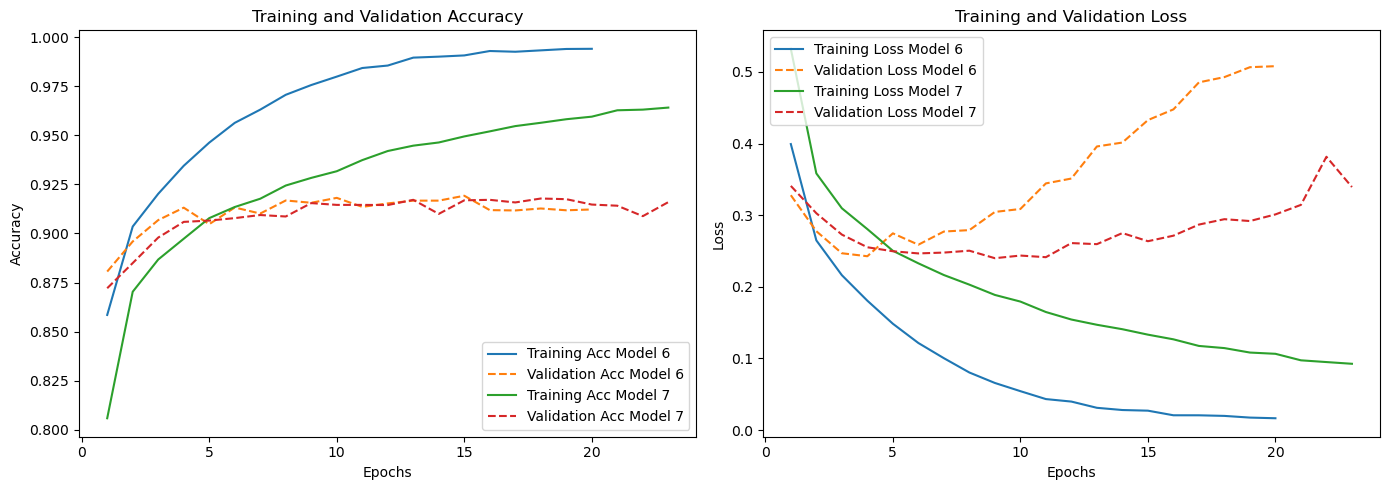

In [16]:
plot_model_history([history6, history7], ['Model 6', 'Model 7'])

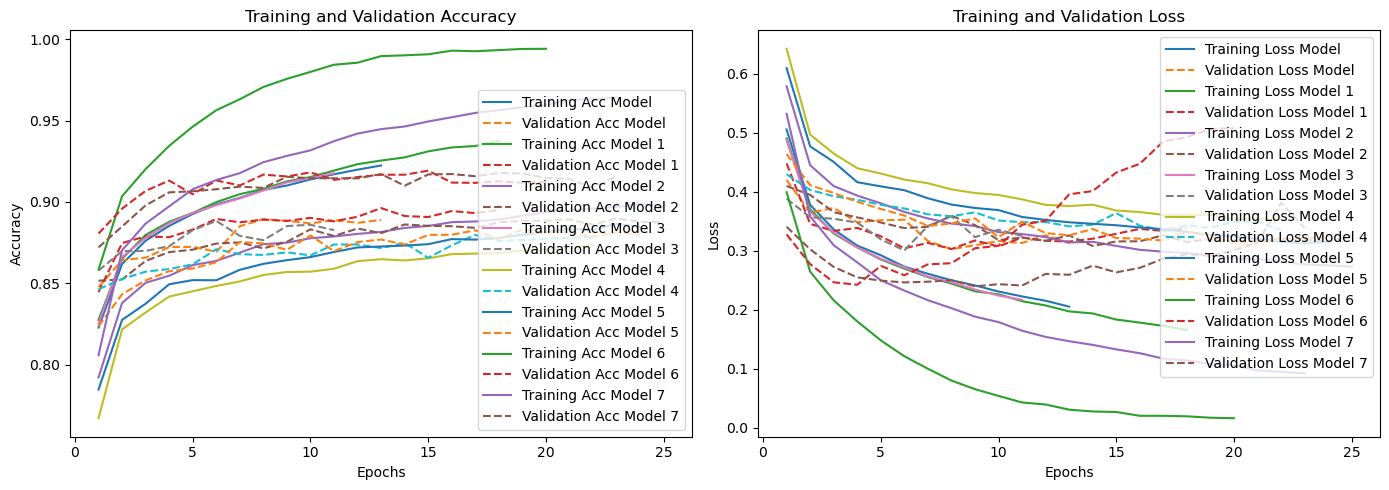

In [17]:
plot_model_history([history, history1, history2, history3, history4, history5, history6, history7], ['Model', 'Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5', 'Model 6', 'Model 7'])

#### 6. Try to use a pre-trained network to improve accuracy.

Note to self, I think we used this in class? Not 100% sure, but this might be referncing the one we used in the class. 

In [18]:
import tensorflow as tf

def pad_images(images):
    # Ensure images have a channel dimension, expected shape: [num_images, height, width, channels]
    if images.ndim == 3:
        images = images[..., tf.newaxis]

    # Define padding to add 2 pixels on top, bottom, left, and right, and no padding on the batch and channels
    padding = [[0, 0], [2, 2], [2, 2], [0, 0]]
    
    # Apply constant padding
    images_padded = tf.pad(images, paddings=padding, mode='CONSTANT', constant_values=0)
    return images_padded

train_images_padded = pad_images(train_images)
val_images_padded = pad_images(val_images)


In [19]:
from tensorflow.keras import Sequential
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model

# Load MobileNetV2 without the top layer to use as a base model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3), alpha=1.0)

# Freeze the base model layers
base_model.trainable = False

model8 = Sequential([
    base_model,
    GlobalAveragePooling2D(),  # Reduces each feature map to a single value
    BatchNormalization(),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the enhanced model
model8.compile(optimizer='adam',
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])


C:\Users\iandr\AppData\Local\Temp\ipykernel_37340\2704174607.py:7: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3), alpha=1.0)


In [20]:
def convert_to_rgb(images):
    # Images are expected to be in [num_images, 32, 32, 1]
    # Convert them to RGB by repeating the single channel three times
    images_rgb = tf.repeat(images, 3, axis=-1)
    return images_rgb

train_images_rgb = convert_to_rgb(train_images_padded)
val_images_rgb = convert_to_rgb(val_images_padded)


In [21]:
# Fit the model
history8 = model8.fit(
    train_images_rgb, train_labels,
    epochs=10,
    validation_data=(val_images_rgb, val_labels),
    callbacks=[EarlyStopping(monitor='val_accuracy', patience=3)])


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 62s 37ms/step - accuracy: 0.4474 - loss: 1.4892 - val_accuracy: 0.5255 - val_loss: 1.2809
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 53s 36ms/step - accuracy: 0.5128 - loss: 1.3108 - val_accuracy: 0.5428 - val_loss: 1.2372
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 53s 35ms/step - accuracy: 0.5228 - loss: 1.2854 - val_accuracy: 0.5425 - val_loss: 1.2298
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 53s 35ms/step - accuracy: 0.5277 - loss: 1.2569 - val_accuracy: 0.5462 - val_loss: 1.2329
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 53s 35ms/step - accuracy: 0.5276 - loss: 1.2552 - val_accuracy: 0.5491 - val_loss: 1.2171
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 53s 35ms/step - accuracy: 0.5336 - loss: 1.2431 - val_accuracy: 0.5493 - val_loss: 1.2158
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 55s 37ms/step - accuracy: 0.5380 - loss: 1.2288 - val_accuracy: 0.5541 - val_loss: 1.1957
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 54s 36ms/step - accuracy: 0.5465 -

#### 2 points) Select a final model and evaluate it on the test set. How does the test error compare to the validation error?

In [22]:
import pandas as pd


# Assuming 'models' contains all your model instances
models = [model, model1, model2, model3, model4, model5, model6, model7]

# Initialize an empty list to store results
results = []

# Loop through each model and evaluate it
for i, model in enumerate(models):
    test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)
    # Append results to the list
    results.append({'Model': f'Model{i}', 'Loss': test_loss, 'Accuracy': test_accuracy})

# Convert the list of results into a DataFrame
results_df = pd.DataFrame(results)

results_df


313/313 - 1s - 2ms/step - accuracy: 0.8800 - loss: 0.3408
313/313 - 1s - 2ms/step - accuracy: 0.8885 - loss: 0.3614
313/313 - 1s - 2ms/step - accuracy: 0.8866 - loss: 0.3555
313/313 - 1s - 2ms/step - accuracy: 0.8783 - loss: 0.3556
313/313 - 1s - 2ms/step - accuracy: 0.8757 - loss: 0.3534
313/313 - 1s - 2ms/step - accuracy: 0.8743 - loss: 0.3532
313/313 - 1s - 2ms/step - accuracy: 0.9120 - loss: 0.5429
313/313 - 1s - 4ms/step - accuracy: 0.9105 - loss: 0.3806


,Model,Loss,Accuracy
0,Model0,0.340841,0.8800
1,Model1,0.361408,0.8885
2,Model2,0.355531,0.8866
3,Model3,0.355629,0.8783
4,Model4,0.353384,0.8757
5,Model5,0.353243,0.8743
6,Model6,0.542853,0.9120
7,Model7,0.380578,0.9105


In [23]:
from tensorflow.keras.losses import MeanSquaredError
import numpy as np

# Assuming model5 is compiled and ready for predictions
# Predicting on the test set
test_predictions = model7.predict(test_images)

# Assuming test_labels are in the correct shape for regression (or adjusted for classification)
mse = MeanSquaredError()
test_mse = mse(test_labels, test_predictions).numpy()

# Assuming you have the validation MSE stored. Let's say it's 0.02 for example.
validation_mse = 0.02

print(f"Test MSE: {test_mse:.4f}")
print(f"Validation MSE: {validation_mse:.4f}")

# Comparing the test MSE to the validation MSE
if test_mse > validation_mse:
    print("The test MSE is higher than the validation MSE, indicating potential overfitting.")
else:
    print("The test MSE is comparable to or lower than the validation MSE, indicating good generalization.")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Test MSE: 0.0140
Validation MSE: 0.0200
The test MSE is comparable to or lower than the validation MSE, indicating good generalization.
